# Test Faster-R-CNN Model

In [76]:
from matplotlib import pyplot as plt
from PIL import Image
import pickle
from gluoncv import data, utils
import torch
import numpy as np

from detectron2.modeling import build_model
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

In [40]:
print(torch.cuda.is_available())

False


In [97]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("Base-RCNN-FPN.yaml"))
cfg.MODEL.WEIGHTS = "detectron2://ImageNetPretrained/FAIR/X-101-32x8d.pkl"
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.MODEL.DEVICE = 'cpu'

model = DefaultPredictor(cfg)

AssertionError: Config file './detectron2_repo/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml' does not exist!

In [89]:
image_path = 'test_images/input.jpg'

In [90]:
im_fname = Image.open(image_path)

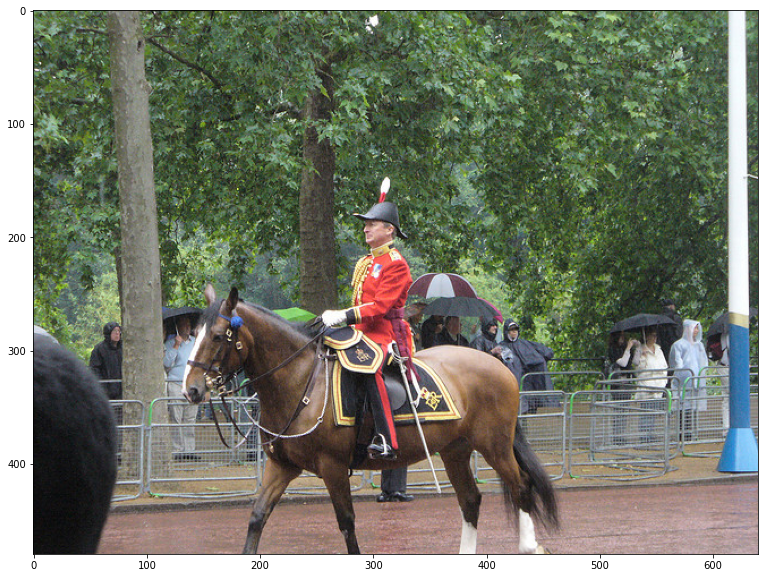

In [91]:
plt.figure(figsize=(20,10))
plt.imshow(im_fname)

In [94]:
x, reshaped_img = data.transforms.presets.rcnn.load_test(image_path)

In [95]:
output = model(reshaped_img)

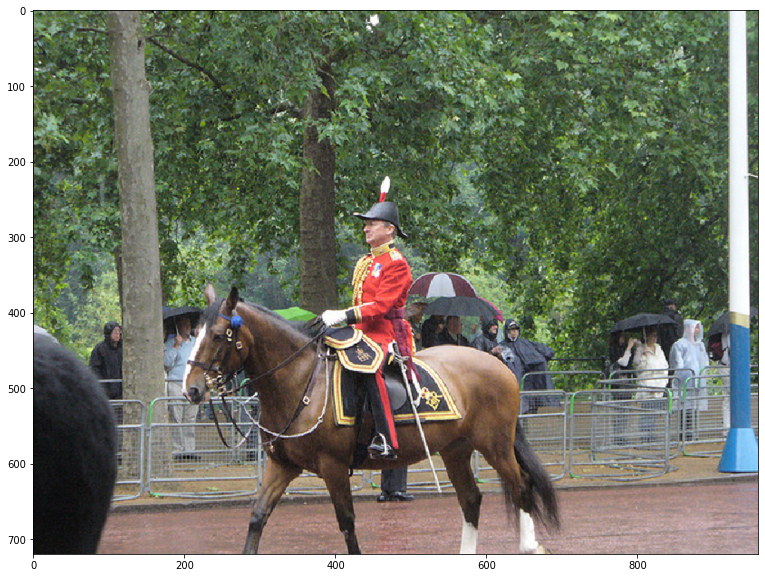

In [96]:
visualizer = Visualizer(reshaped_img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
vis = visualizer.draw_instance_predictions(output["instances"].to("cpu"))
img = Image.fromarray(np.uint8(vis.get_image()[:, :, ::-1]))
plt.figure(figsize=(20,10))
plt.imshow(img)

In [48]:
box_ids, scores, bboxes = model(x)

AttributeError: 'NDArray' object has no attribute 'strides'

In [21]:
x


[[[[2.2489083 2.2489083 2.2489083 ... 2.2489083 2.2489083 2.2489083]
   [2.2489083 2.2489083 2.2489083 ... 2.2489083 2.2489083 2.2489083]
   [2.2489083 2.2489083 2.2489083 ... 2.2489083 2.2489083 2.2489083]
   ...
   [2.2489083 2.2489083 2.2489083 ... 2.2489083 2.2489083 2.2489083]
   [2.2489083 2.2489083 2.2489083 ... 2.2489083 2.2489083 2.2489083]
   [2.2489083 2.2489083 2.2489083 ... 2.2489083 2.2489083 2.2489083]]

  [[2.4285715 2.4285715 2.4285715 ... 2.4285715 2.4285715 2.4285715]
   [2.4285715 2.4285715 2.4285715 ... 2.4285715 2.4285715 2.4285715]
   [2.4285715 2.4285715 2.4285715 ... 2.4285715 2.4285715 2.4285715]
   ...
   [2.4285715 2.4285715 2.4285715 ... 2.4285715 2.4285715 2.4285715]
   [2.4285715 2.4285715 2.4285715 ... 2.4285715 2.4285715 2.4285715]
   [2.4285715 2.4285715 2.4285715 ... 2.4285715 2.4285715 2.4285715]]

  [[2.64      2.64      2.64      ... 2.64      2.64      2.64     ]
   [2.64      2.64      2.64      ... 2.64      2.64      2.64     ]
   [2.64      2